In [1]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer # 处理缺失值
data = pd.read_csv('C1.csv')
data.set_index('Day',inplace=True)
data.fillna(method='pad')
data

,Year,Month,Day_num,Last_day_value,C1
Day,,,,,
2015/1/2,2015,1,42006,NaN,-15.776760
2015/1/5,2015,1,42009,-15.776760,-16.496330
2015/1/6,2015,1,42010,-16.496330,-16.548551
2015/1/7,2015,1,42011,-16.548551,-13.489590
2015/1/8,2015,1,42012,-13.489590,-10.824681
...,...,...,...,...,...
2021/11/24,2021,11,44524,NaN,NaN
2021/11/25,2021,11,44525,NaN,NaN
2021/11/26,2021,11,44526,NaN,NaN


In [2]:
train = data[1:1006]
test = data[1007:1258]
x_train = train.drop(train.columns[len(train.columns)-1],axis=1)
y_train = pd.DataFrame(train[train.columns[-1]])
x_test = test.drop(test.columns[len(test.columns)-1],axis=1)
y_test = pd.DataFrame(test[test.columns[-1]])

In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
clf3 = GradientBoostingRegressor()
clf2 = LinearRegression()
"""fit model"""
model = clf2.fit(x_train, y_train)
pred = model.predict(x_test)
model.score(x_test,y_test)


0.9903405835550659

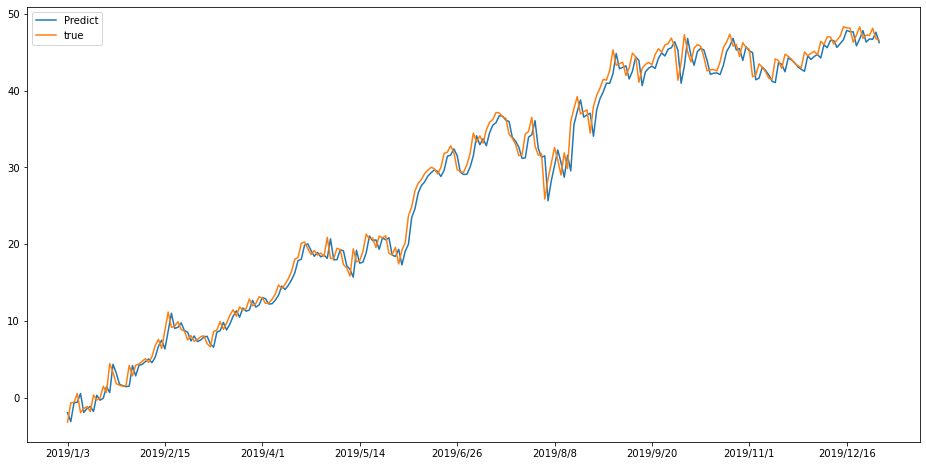

,Predictions,true
Day,,
2019/1/3,-1.948189,-3.156868
2019/1/4,-3.095039,-0.658364
2019/1/7,-0.638754,-0.592934
2019/1/8,-0.576809,0.559788
2019/1/9,0.557426,-1.935196
...,...,...
2019/12/24,46.317037,47.229307
2019/12/26,46.728161,47.183539
2019/12/27,46.680442,48.124804


In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
dict_data = {
    'Predictions': pred.flatten(),
    'true': y_test.values.flatten()
}

data_pd = pd.DataFrame(dict_data,index=test.index)

plt.plot(data_pd['Predictions'],label = 'Predict')
plt.plot(data_pd['true'],label = 'true')

plt.xticks(data_pd.index[::30],data_pd.index[::30])
plt.legend()
plt.show()
data_pd

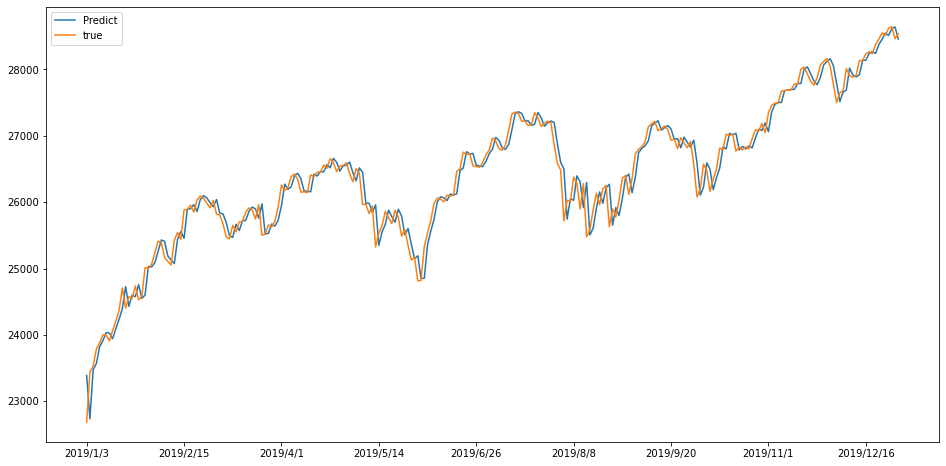

0.964426627138572

In [5]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer # 处理缺失值
data = pd.read_csv('close.csv')
data.set_index('Day',inplace=True)
data.fillna(method='pad')
train = data[1:1006]
test = data[1007:1258]
x_train = train.drop(train.columns[len(train.columns)-1],axis=1)
y_train = pd.DataFrame(train[train.columns[-1]])
x_test = test.drop(test.columns[len(test.columns)-1],axis=1)
y_test = pd.DataFrame(test[test.columns[-1]])
"""fit model"""
model = clf2.fit(x_train, y_train)
pred = model.predict(x_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
dict_data = {
    'Predictions': pred.flatten(),
    'true': y_test.values.flatten()
}

data_pd = pd.DataFrame(dict_data,index=test.index)

plt.plot(data_pd['Predictions'],label = 'Predict')
plt.plot(data_pd['true'],label = 'true')

plt.xticks(data_pd.index[::30],data_pd.index[::30])
plt.legend()
plt.show()
model.score(x_test,y_test)